In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

/home/kenpu/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
boston = sklearn.datasets.load_boston()

In [3]:
boston.data.shape

(506, 13)

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
boston.data.shape

(506, 13)

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [7]:
boston.target.shape

(506,)

# Inspection of the housing price

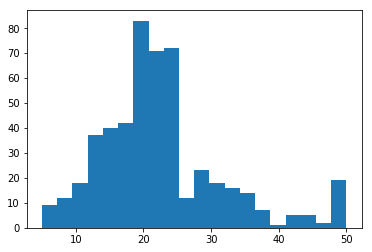

In [11]:
plt.hist(boston.target, bins=20);

# Crime rate

In [14]:
feature_names = list(boston.feature_names)

In [19]:
crime_data = boston.data[:, feature_names.index('CRIM')]

In [20]:
crime_data.shape

(506,)

In [23]:
np.mean(crime_data), np.max(crime_data), np.min(crime_data)

(3.5937607114624512, 88.976200000000006, 0.0063200000000000001)

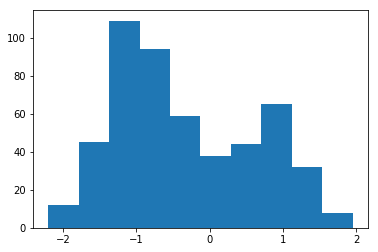

In [27]:
plt.hist(np.log10(crime_data));

In [29]:
crime_town_index = np.argsort(crime_data)

In [31]:
crime_town_index[:10], crime_data[crime_town_index[:10]]

(array([  0, 284, 285, 341,  55,  54, 195,  57, 194, 348]),
 array([ 0.00632,  0.00906,  0.01096,  0.01301,  0.01311,  0.0136 ,
         0.01381,  0.01432,  0.01439,  0.01501]))

In [32]:
crime_town_index[-10:], crime_data[crime_town_index[-10:]]

(array([417, 413, 427, 398, 404, 414, 410, 405, 418, 380]),
 array([ 25.9406,  28.6558,  37.6619,  38.3518,  41.5292,  45.7461,
         51.1358,  67.9208,  73.5341,  88.9762]))

# Lower status population %

In [33]:
lstat_data = boston.data[:, feature_names.index('LSTAT')]

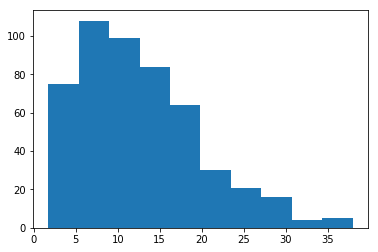

In [34]:
plt.hist(lstat_data);

# Pupil Teacher Ratio

In [35]:
pt_data = boston.data[:, feature_names.index('PTRATIO')]

(0, 25)

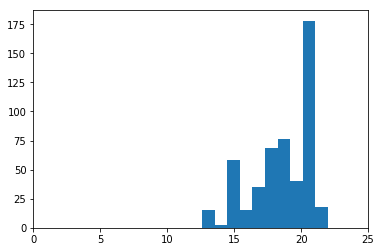

In [37]:
plt.hist(pt_data);
plt.xlim(0, 25)

# PT-Ratio vs CRIM vs LSTAT

Text(0,0.5,'PT Ratio')

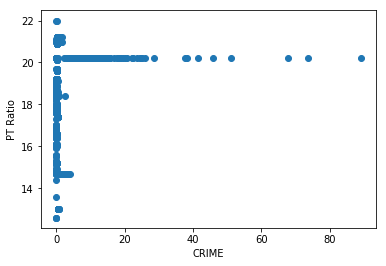

In [39]:
plt.scatter(crime_data, pt_data);
plt.xlabel('CRIME');
plt.ylabel('PT Ratio')

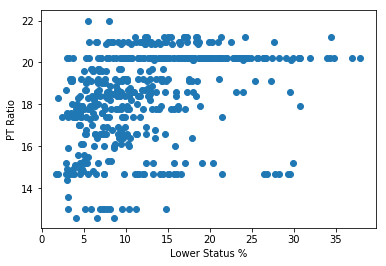

In [40]:
plt.scatter(lstat_data, pt_data);
plt.xlabel('Lower Status %');
plt.ylabel('PT Ratio');

In [41]:
np.corrcoef(pt_data, crime_data)

array([[ 1.        ,  0.28825016],
       [ 0.28825016,  1.        ]])

In [42]:
np.corrcoef(pt_data, lstat_data)

array([[ 1.        ,  0.37404432],
       [ 0.37404432,  1.        ]])

In [43]:
np.corrcoef(crime_data, lstat_data)

array([[ 1.        ,  0.45222028],
       [ 0.45222028,  1.        ]])

# Most indicative factors for housing price

In [44]:
price_data = boston.target

In [45]:
np.corrcoef(price_data, crime_data)

array([[ 1.        , -0.38583169],
       [-0.38583169,  1.        ]])

In [52]:
coefs = []
for index, name in enumerate(feature_names):
    data = boston.data[:, index]
    c = np.corrcoef(price_data, data)[0,1]
    coefs.append((name, c))
coefs.sort(key=lambda x: x[1])

In [53]:
coefs

[('LSTAT', -0.73766272617401474),
 ('PTRATIO', -0.50778668553756146),
 ('INDUS', -0.48372516002837285),
 ('TAX', -0.4685359335677669),
 ('NOX', -0.42732077237328242),
 ('CRIM', -0.38583168988399047),
 ('RAD', -0.38162623063977746),
 ('AGE', -0.37695456500459601),
 ('CHAS', 0.17526017719029818),
 ('DIS', 0.24992873408590388),
 ('B', 0.33346081965706637),
 ('ZN', 0.36044534245054333),
 ('RM', 0.69535994707153903)]

In [54]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      